In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [2]:
# Preparing data
x = np.arange(0, 1, 1/22) # Input
X = x
# Given formula
d = ((1 + 0.6*np.sin(2*np.pi*x/0.7)) + (0.3*np.sin(2*np.pi*x)))/2

In [3]:
# First (hidden) layer
w11_1 = random()
w12_1 = random()
w13_1 = random()
b1_1 = random()
b2_1 = random()
b3_1 = random()
# Last (output) layer
w11_2 = random()
w21_2 = random()
w31_2 = random()
b1_2 = random()

eta = 0.1

In [4]:
# Training
for index in range(15000):
    for i in range(len(x)):
        # First (hidden) layer
        v1_1 = x[i]*w11_1 + b1_1
        v2_1 = x[i]*w12_1 + b2_1
        v3_1 = x[i]*w13_1 + b3_1
        # Activation
        y1_1 = np.tanh(v1_1)
        y2_1 = np.tanh(v2_1)
        y3_1 = np.tanh(v3_1)
        
        # Last (output) layer
        v1_2 = y1_1*w11_2 + y2_1*w21_2 + y3_1*w31_2 + b1_2
        y1_2 = v1_2
        
        # Calculate error
        e = d[i] - y1_2
        
        # Update weigths
        delta1_2 = e
        delta1_1 = (1-(np.tanh(y1_1)**2))*delta1_2*w11_2
        delta2_1 = (1-(np.tanh(y2_1)**2))*delta1_2*w21_2
        delta3_1 = (1-(np.tanh(y3_1)**2))*delta1_2*w31_2

        w11_2 = w11_2+eta*delta1_2*y1_1
        w21_2 = w21_2+eta*delta1_2*y2_1
        w31_2 = w31_2+eta*delta1_2*y3_1
        b1_2  = b1_2+eta*delta1_2

        w11_1 = w11_1+eta*delta1_1*x[i]
        w12_1 = w12_1+eta*delta2_1*x[i]
        w13_1 = w13_1+eta*delta3_1*x[i]
        b1_1  = b1_1+eta*delta1_1
        b2_1  = b2_1+eta*delta2_1
        b3_1  = b3_1+eta*delta3_1

In [5]:
# Testing
x = np.arange(0, 1, 1/220)
y = np.zeros(len(x))
for i in range(len(x)):
    # First (hidden) layer
    v1_1 = x[i]*w11_1 + b1_1;
    v2_1 = x[i]*w12_1 + b2_1;
    v3_1 = x[i]*w13_1 + b3_1;
    #  Activation
    y1_1 = np.tanh(v1_1);
    y2_1 = np.tanh(v2_1);
    y3_1 = np.tanh(v3_1);
    # Last (output) layer
    v1_2 = y1_1*w11_2 + y2_1*w21_2 + y3_1*w31_2 + b1_2;
    y[i] = v1_2

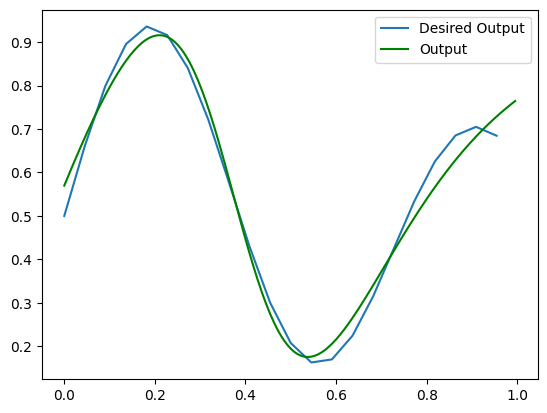

In [6]:
plt.plot(X, d, label='Desired Output')
plt.plot(x, y, 'g', label='Output')
plt.legend()
plt.show()